In [1]:
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
import numpy as np
import pandas as pd
from pandas import DataFrame
import math
from sklearn import metrics
from sklearn.metrics import r2_score
%run function.py

In [2]:
data_30 = pd.read_csv("paper_pricing_by_bsm_test.csv")

# Separate by Moneyness Ratio
VDOTM = data_30[data_30['moneyness_ratio'] < 0.85]
DOTM = data_30[(data_30['moneyness_ratio'] >= 0.85) & (data_30['moneyness_ratio'] < 0.9)]
OTM = data_30[(data_30['moneyness_ratio'] >= 0.9) & (data_30['moneyness_ratio'] < 0.95)]
JOTM = data_30[(data_30['moneyness_ratio'] >= 0.95) & (data_30['moneyness_ratio'] < 0.99)]
ATM = data_30[(data_30['moneyness_ratio'] >= 0.99) & (data_30['moneyness_ratio'] < 1.01)]
JITM = data_30[(data_30['moneyness_ratio'] >= 1.01) & (data_30['moneyness_ratio'] < 1.05)]
ITM = data_30[(data_30['moneyness_ratio'] >= 1.05) & (data_30['moneyness_ratio'] < 1.1)]
DITM = data_30[(data_30['moneyness_ratio'] >= 1.1) & (data_30['moneyness_ratio'] < 1.35)]
VDITM = data_30[data_30['moneyness_ratio'] >= 1.35]

#VDOTM = a[a['moneyness_ratio'] < 0.85]
#DOTM = a[(a['moneyness_ratio'] >= 0.85) & (a['moneyness_ratio'] < 0.9)]
#OTM = a[(a['moneyness_ratio'] >= 0.9) & (a['moneyness_ratio'] < 0.95)]
#JOTM = a[(a['moneyness_ratio'] >= 0.95) & (a['moneyness_ratio'] < 0.99)]
#ATM = a[(a['moneyness_ratio'] >= 0.99) & (a['moneyness_ratio'] < 1.01)]
#JITM = a[(a['moneyness_ratio'] >= 1.01) & (a['moneyness_ratio'] < 1.05)]
#ITM = a[(a['moneyness_ratio'] >= 1.05) & (a['moneyness_ratio'] < 1.1)]
#DITM = a[(a['moneyness_ratio'] >= 1.1) & (a['moneyness_ratio'] < 1.35)]
#VDITM = a[a['moneyness_ratio'] >= 1.35]

# Separate by Time to Maturity
extreme_short_term = data_30[data_30['T'] < 6]
short_term = data_30[data_30['T'] < 60]
medium_term = data_30[(data_30['T'] >= 60) & (data_30['T'] < 180)]
long_term = data_30[data_30['T'] >= 180]

In [57]:
#a = short_term
#b = a[a['moneyness_ratio'] >= 1.35]

data_eval = data_30

bs_price = 'bs_HV60'

0.0070012404460692
0.05725760615864648
0.8126400921052938


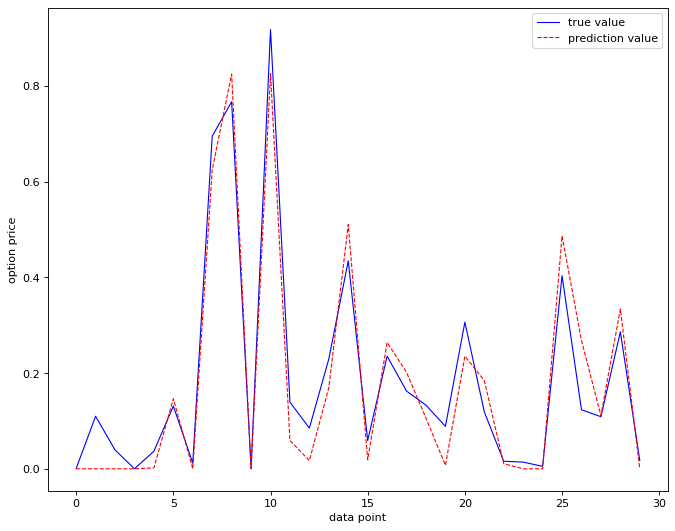

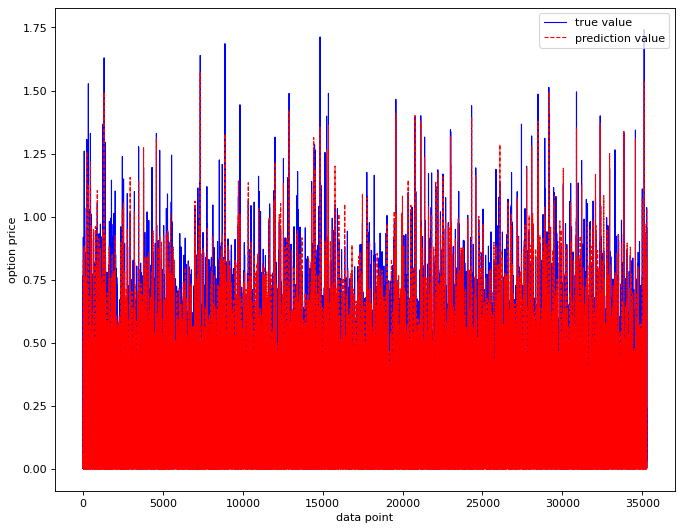

In [58]:
MSE = metrics.mean_squared_error(data_eval['close'], data_eval[bs_price])
MAE = metrics.mean_absolute_error(data_eval['close'], data_eval[bs_price])
r2 = r2_score(data_eval['close'], data_eval[bs_price])

print(MSE)
print(MAE)
print(r2)

prediction_visualization(data_eval['close'], data_eval[bs_price], 30, 0)
prediction_visualization(data_eval['close'], data_eval[bs_price], len(data_eval), 0)

In [59]:
# BS price modification
for i in data_eval.index:
    if data_eval.loc[i, bs_price] < 0:
        data_eval.loc[i, bs_price] = 0

#data_eval.shape

0.0070012404460692
0.05725760615864648
0.8126400921052938


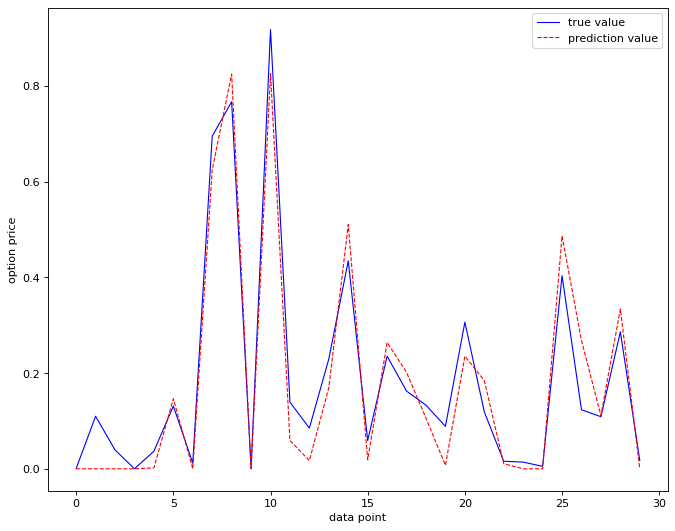

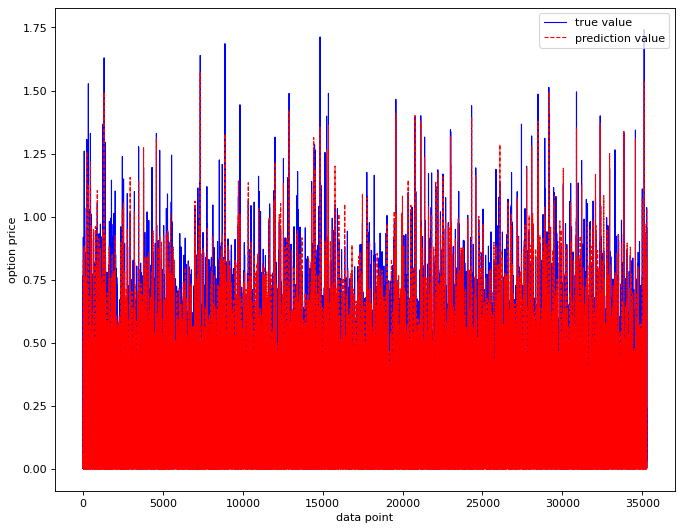

In [60]:
MSE = metrics.mean_squared_error(data_eval['close'], data_eval[bs_price])
MAE = metrics.mean_absolute_error(data_eval['close'], data_eval[bs_price])
r2 = r2_score(data_eval['close'], data_eval[bs_price])

print(MSE)
print(MAE)
print(r2)

prediction_visualization(data_eval['close'], data_eval[bs_price], 30, 0)
prediction_visualization(data_eval['close'], data_eval[bs_price], len(data_eval), 0)

In [61]:
# Separate by performance quantile
ae_bs = abs(data_eval['close'] - data_eval[bs_price])
b = ae_bs.sort_values(ascending = False)
BS_1st_quantile = data_eval.loc[abs(data_eval['close'] - data_eval[bs_price]) <= b.quantile(0.25)]
BS_2nd_quantile = data_eval.loc[(abs(data_eval['close'] - data_eval[bs_price]) > b.quantile(0.25)) & (abs(data_eval['close'] - data_eval[bs_price]) <= b.quantile(0.5))]
BS_3rd_quantile = data_eval.loc[(abs(data_eval['close'] - data_eval[bs_price]) > b.quantile(0.5)) & (abs(data_eval['close'] - data_eval[bs_price]) <= b.quantile(0.75))]
BS_4th_quantile = data_eval.loc[abs(data_eval['close'] - data_eval[bs_price]) > b.quantile(0.75)]

# Separate by esitimation precision
BS_under_average_precision = data_eval.loc[abs(data_eval['close'] - data_eval[bs_price]) > MAE]
BS_above_average_precision = data_eval.loc[abs(data_eval['close'] - data_eval[bs_price]) <= MAE]

0.02370217834697696
0.1394991465389934
0.5206067721983565


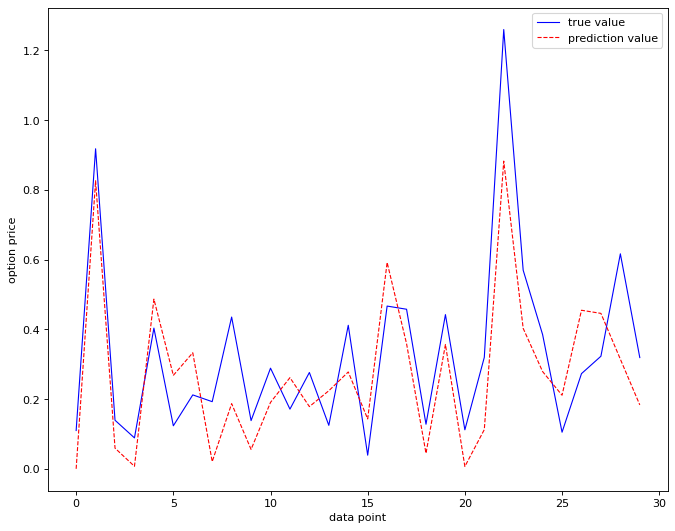

In [62]:
data_eval_by_precision = BS_4th_quantile

MSE = metrics.mean_squared_error(data_eval_by_precision['close'], data_eval_by_precision[bs_price])
MAE = metrics.mean_absolute_error(data_eval_by_precision['close'], data_eval_by_precision[bs_price])
r2 = r2_score(data_eval_by_precision['close'], data_eval_by_precision[bs_price])

print(MSE)
print(MAE)
print(r2)

prediction_visualization(data_eval_by_precision['close'], data_eval_by_precision[bs_price], 30, 0)